<a href="https://colab.research.google.com/github/pramit46/LLMTry/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Another POC with Boston Housing Dataset

In [ ]:
from keras.datasets import boston_housing

In [ ]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sd=StandardScaler()

In [ ]:
X_train=sd.fit_transform(X_train)

In [ ]:
X_train.shape

(404, 13)

In [ ]:
X_test=sd.transform(X_test)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

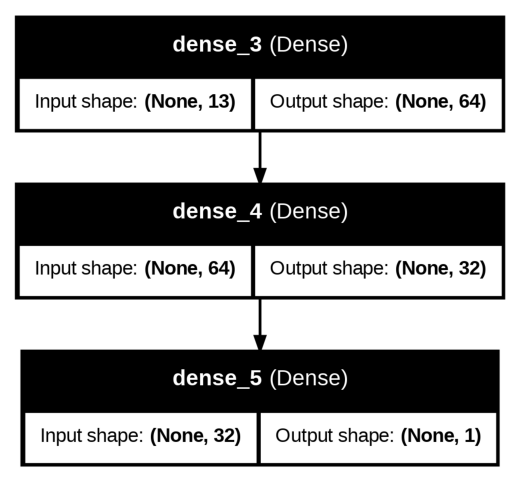

In [ ]:
# Plot the ANN model
plot_model(model, to_file='model_reg.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8, 6))
img = plt.imread('model_reg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error" )

In [ ]:
#h=model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose="false")

In [ ]:
h=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7923 - val_loss: 3.3588
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7408 - val_loss: 3.4988
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5273 - val_loss: 3.5110
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5619 - val_loss: 3.6032
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4971 - val_loss: 3.4900
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4460 - val_loss: 3.4897
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5477 - val_loss: 3.5349
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5798 - val_loss: 3.4520
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5776 - val_loss: 3.5401
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4639 - val_loss: 3.3688
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4140 - val_loss: 3.4476
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [ ]:
#model.fit(X_train, y_train, epochs=100, batch_size=10)

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

test_loss

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.8222


13.15044116973877

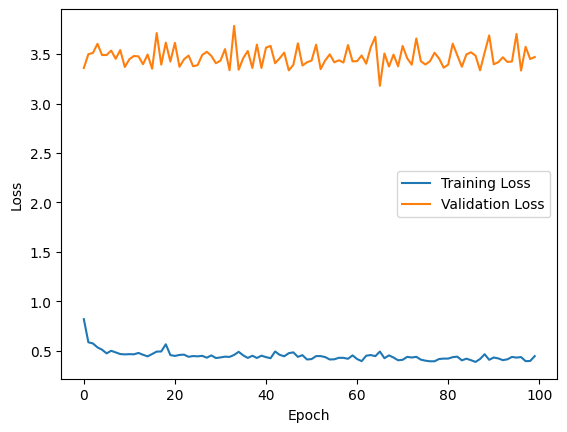

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data=pd.DataFrame(data)
raw_df.head(7)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,392.83000,4.03,34.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.03237,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7


In [ ]:
target

array([[396.9 ,   4.98],
       [396.9 ,   9.14],
       [392.83,   4.03],
       ...,
       [396.9 ,   5.64],
       [393.45,   6.48],
       [396.9 ,   7.88]])

## Graph of various activation functions:

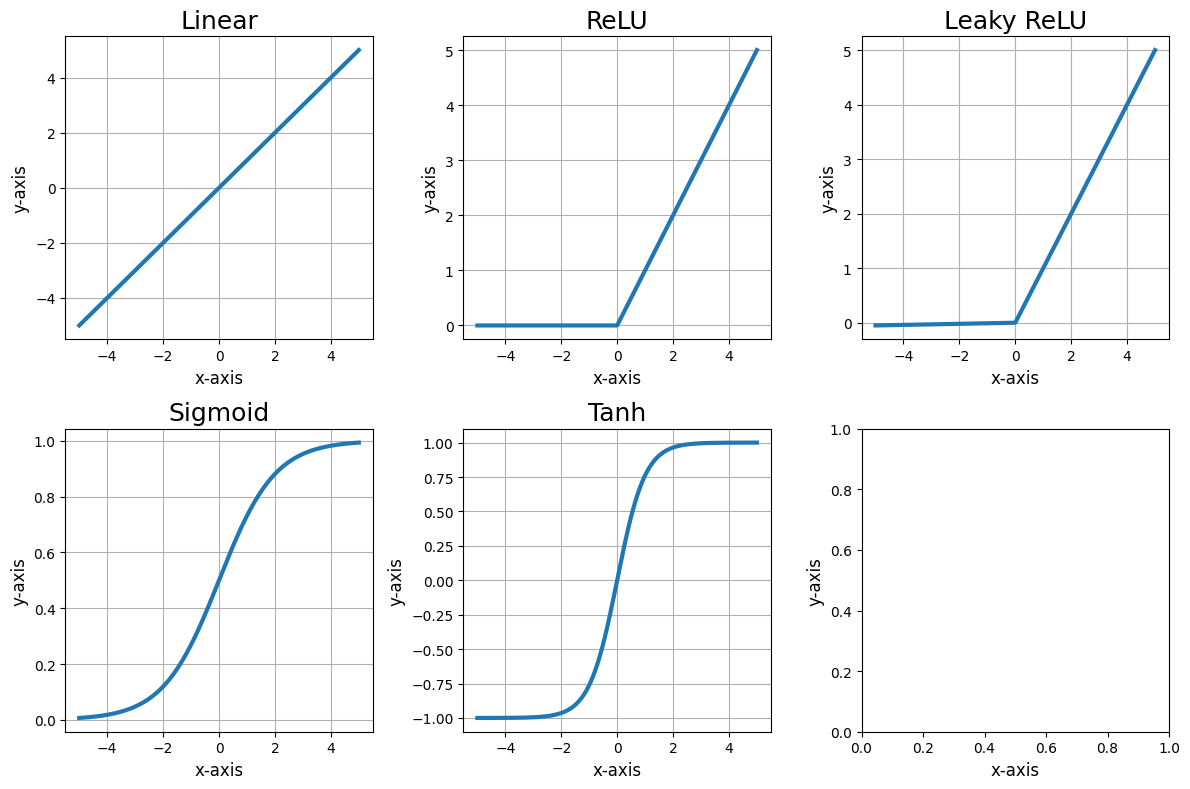

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
    return x

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.maximum(0.01*x, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 1000)

fig, quadrant = plt.subplots(2, 3, figsize=(12, 8))

quadrant[0, 0].plot(x, linear(x), linewidth=3)
quadrant[0, 0].set_title('Linear', fontsize=18)
quadrant[0, 0].grid()

quadrant[0, 1].plot(x, relu(x), linewidth=3)
quadrant[0, 1].set_title('ReLU', fontsize=18)
quadrant[0, 1].grid()

quadrant[0, 2].plot(x, leaky_relu(x), linewidth=3)
quadrant[0, 2].set_title('Leaky ReLU', fontsize=18)
quadrant[0, 2].grid()

quadrant[1, 0].plot(x, sigmoid(x), linewidth=3)
quadrant[1, 0].set_title('Sigmoid', fontsize=18)
quadrant[1, 0].grid()

quadrant[1, 1].plot(x, tanh(x), linewidth=3)
quadrant[1, 1].set_title('Tanh', fontsize=18)
quadrant[1, 1].grid()

for quad in quadrant.flat:
    quad.set(xlabel='x-axis', ylabel='y-axis')
    quad.xaxis.label.set_size(12)
    quad.yaxis.label.set_size(12)

fig.tight_layout()
plt.show()

In [ ]:
x

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

## My Try

In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


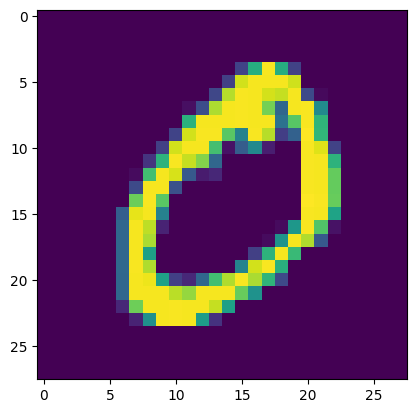

In [3]:
plt.imshow(x_train[1])

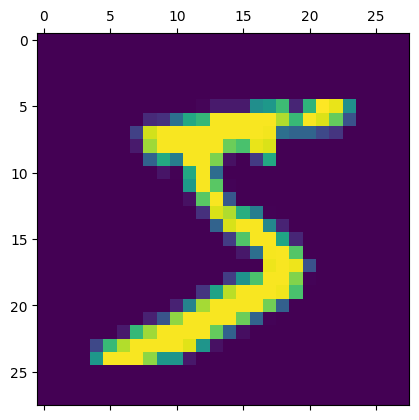

In [4]:
plt.matshow(x_train[0])

In [ ]:
y_test[1]

2

In [ ]:
x_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  12,
          0,   6, 206, 253, 140,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77, 251, 210,  25,   0,   0,
          0, 122, 248, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  31,  18,   0,   0,   0,
          0, 209, 253, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        117, 247, 253, 198,  10,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76,
        247, 253, 231,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128,
        253, 253, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 176, 246,
        253, 159,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 234, 253,
        233,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 253, 253,
        141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 248, 253, 189,
         12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  19, 200, 253, 253, 141,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 134, 253, 253, 173,  12,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  25,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  43,  20,
         20,  20,  20,   5,   0,   5,  20,  20,  37, 150, 150, 150, 147,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253, 253, 253,
        253, 253, 253, 168, 143, 166, 253, 253, 253, 253, 253, 253, 253,
        123,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 249, 247, 247, 169, 117, 117,
         57,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 123, 123, 123,
        166, 253, 253, 253, 155, 123, 123,  41,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

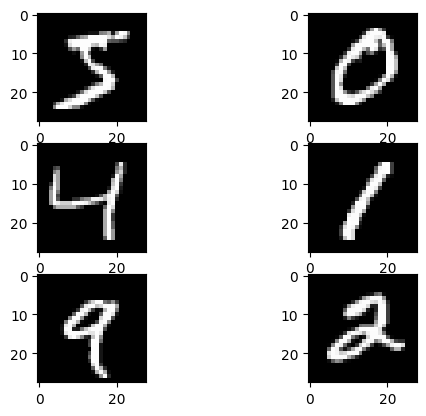

In [ ]:
import matplotlib.pyplot as plt
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.imshow(x_train[i], cmap='gray')
plt.show()

In [ ]:
model=Sequential(
    [
        keras.layers.Flatten(),
        Dense(10, input_shape=(28*28,),activation="relu"),
        Dense(10, activation="relu"),
        Dense(10, activation="sigmoid")
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
params={
    "loss":"sparse_categorical_crossentropy",
    "metrics":["accuracy"],
    "optimizer":"adam"
}
model.compile(**params)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
test_X=test_X/255
train_X=train_X/255
train_X.shape

NameError: name 'test_X' is not defined

In [ ]:
# Either use this standard piece or use the manual normalization that is mentioned in the next cell.
# In this cell, I tried both MinMaxScaler and StandardScaler and I think MinMaxScaler is performing BETTER

from sklearn.preprocessing import MinMaxScaler, StandardScaler
#mms=MinMaxScaler()
mms=StandardScaler()
train_X_scaled=mms.fit_transform(x_train.reshape(-1, 28*28))
test_X_scaled=mms.fit_transform(x_test.reshape(-1, 28*28))
train_X_scaled[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

In [ ]:
train_X_flattened=x_train.reshape(len(x_train),28*28)
test_X_flattened=x_test.reshape(len(x_test),28*28)
train_X_flattened.shape

(60000, 784)

In [ ]:
# In this cell I performed a manual normalization but I believe the MinMaxScaler is slightly better in terms of accuracy for both train and validation datasets

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
#x_train=mms.fit_transform(x_train.reshape(-1,28*28))
#x_test=mms.fit_transform(x_test.reshape(-1,28*28))
x_train=mms.fit_transform(x_train.reshape(len(x_train), 28*28))
x_test=mms.fit_transform(x_test.reshape(len(x_test), 28*28))


In [ ]:
#h=model.fit(x_train.reshape(len(x_train),28*28),y_train,epochs=50, validation_split=0.1, batch_size=75)
h=model.fit(x_train,y_train,epochs=50, validation_split=0.1, batch_size=100)

Epoch 1/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5630 - loss: 1.3606 - val_accuracy: 0.8927 - val_loss: 0.3817
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8814 - loss: 0.4122 - val_accuracy: 0.9160 - val_loss: 0.2967
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9033 - loss: 0.3364 - val_accuracy: 0.9213 - val_loss: 0.2669
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9096 - loss: 0.3125 - val_accuracy: 0.9268 - val_loss: 0.2502
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9188 - loss: 0.2895 - val_accuracy: 0.9338 - val_loss: 0.2292
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9216 - loss: 0.2704 - val_accuracy: 0.9388 - val_loss: 0.2183
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9255 - loss: 0.2588 - val_accuracy: 0.9402 - val_loss: 0.2111
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9287 - loss: 0.2481 - val_accuracy: 0.

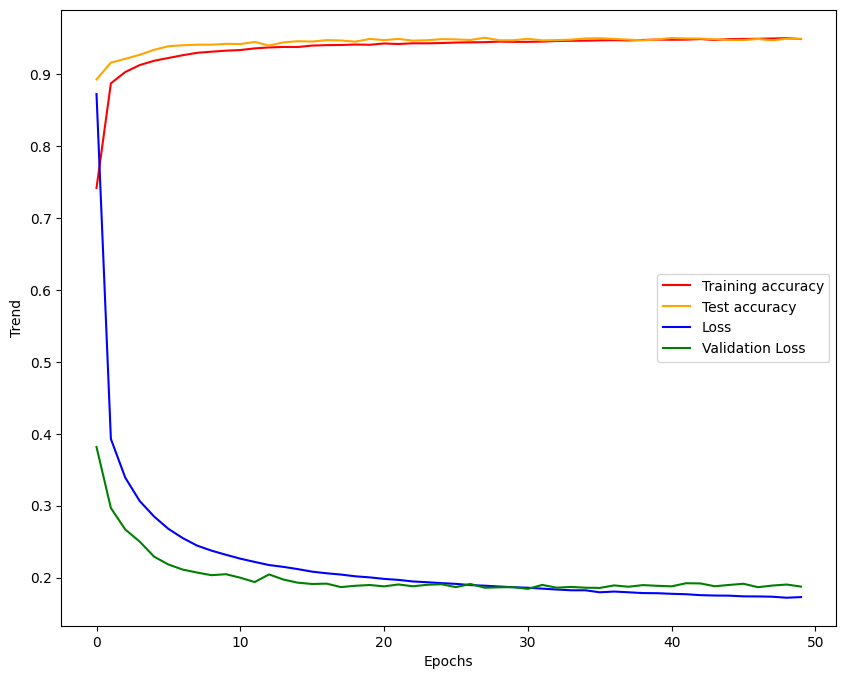

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(h.history['accuracy'], label="Training accuracy", color="red")
plt.plot(h.history['val_accuracy'], label="Test accuracy", color="Orange")
plt.plot(h.history['loss'], label="Loss", color="blue")
plt.plot(h.history['val_loss'], label="Validation Loss", color="green")
plt.xlabel("Epochs")
plt.ylabel('Trend')
#l=[i for i in range(0,len(h.history['accuracy']),10)]
#plt.xticks(l)
plt.legend()
plt.show()

In [ ]:
import numpy as np

y_pred=model.predict(x_test.reshape(-1,28*28), verbose="true")

for i in range(10):
  print(f"The predicted value is: {np.argmax(y_pred[i])} and the actual value is: {y_test[i]}")

The predicted value is: 7 and the actual value is: 7
The predicted value is: 2 and the actual value is: 2
The predicted value is: 1 and the actual value is: 1
The predicted value is: 0 and the actual value is: 0
The predicted value is: 4 and the actual value is: 4
The predicted value is: 1 and the actual value is: 1
The predicted value is: 4 and the actual value is: 4
The predicted value is: 9 and the actual value is: 9
The predicted value is: 6 and the actual value is: 5
The predicted value is: 9 and the actual value is: 9


There is a mismatch where the predicted value is: 6 and the actual value is: 5


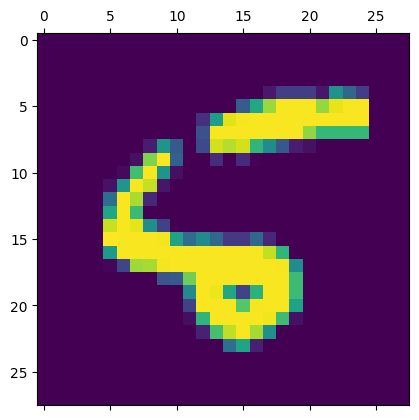

There is a mismatch where the predicted value is: 2 and the actual value is: 6


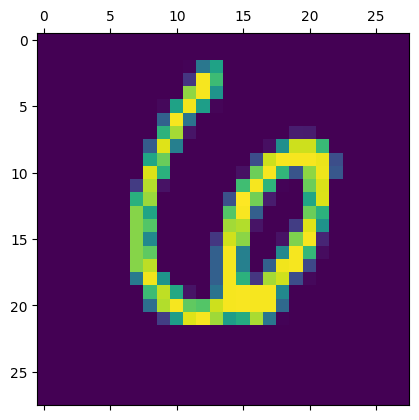

There is a mismatch where the predicted value is: 5 and the actual value is: 9


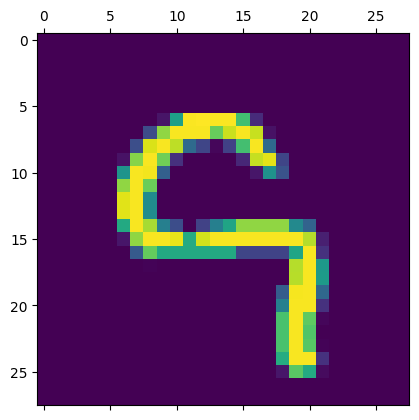

In [ ]:
import numpy as np
for i in range(120):
  if(np.argmax(y_pred[i])!=y_test[i]):
    print(f"There is a mismatch where the predicted value is: {np.argmax(y_pred[i])} and the actual value is: {y_test[i]}")
    plt.matshow(x_test[i].reshape(28,28))
    plt.show()

Text(95.72222222222221, 0.5, 'Prediction')

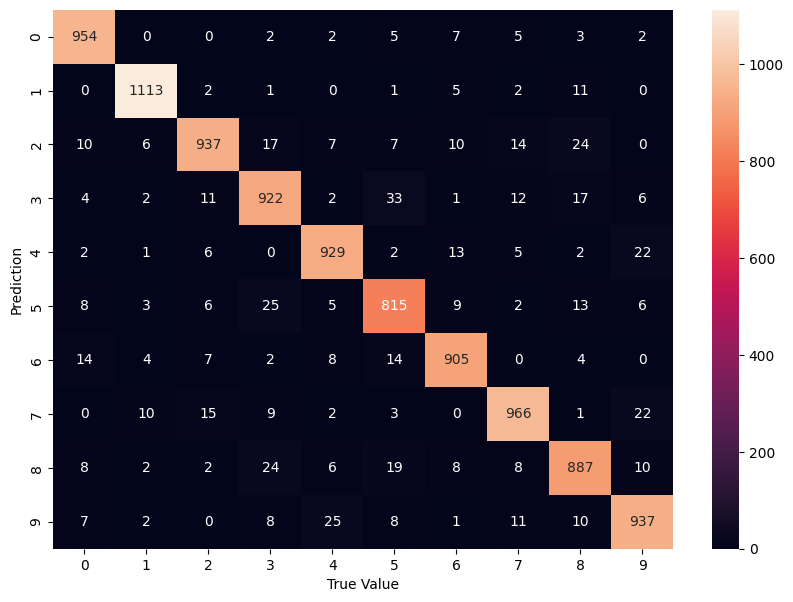

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
y_pred_label=[np.argmax(y_pred[i]) for i in range(len(y_pred))]
cm=confusion_matrix(y_test,y_pred_label)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("True Value")
plt.ylabel("Prediction")

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,np.argmax(y_pred, axis=1))
cm

array([[ 954,    0,    0,    2,    2,    5,    7,    5,    3,    2],
       [   0, 1113,    2,    1,    0,    1,    5,    2,   11,    0],
       [  10,    6,  937,   17,    7,    7,   10,   14,   24,    0],
       [   4,    2,   11,  922,    2,   33,    1,   12,   17,    6],
       [   2,    1,    6,    0,  929,    2,   13,    5,    2,   22],
       [   8,    3,    6,   25,    5,  815,    9,    2,   13,    6],
       [  14,    4,    7,    2,    8,   14,  905,    0,    4,    0],
       [   0,   10,   15,    9,    2,    3,    0,  966,    1,   22],
       [   8,    2,    2,   24,    6,   19,    8,    8,  887,   10],
       [   7,    2,    0,    8,   25,    8,    1,   11,   10,  937]])

In [ ]:
import tensorflow as tf
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    0,    2,    2,    5,    7,    5,    3,    2],
       [   0, 1113,    2,    1,    0,    1,    5,    2,   11,    0],
       [  10,    6,  937,   17,    7,    7,   10,   14,   24,    0],
       [   4,    2,   11,  922,    2,   33,    1,   12,   17,    6],
       [   2,    1,    6,    0,  929,    2,   13,    5,    2,   22],
       [   8,    3,    6,   25,    5,  815,    9,    2,   13,    6],
       [  14,    4,    7,    2,    8,   14,  905,    0,    4,    0],
       [   0,   10,   15,    9,    2,    3,    0,  966,    1,   22],
       [   8,    2,    2,   24,    6,   19,    8,    8,  887,   10],
       [   7,    2,    0,    8,   25,    8,    1,   11,   10,  937]],
      dtype=int32)>

## Play With Hyperparameters

In [ ]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.activations import relu, sigmoid
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Sequential(
    [Flatten(input_shape=(28,28)),
     Dense(10, activation="relu"),
     Dense(10, activation="relu"),
     Dropout(0.2),
     Dense(10, activation="sigmoid")
    ]
)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers
model.get_weights()
model.get_config()
model.get_metrics_result()

In [ ]:
# Scaling: Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
import tensorflow as tf
h=model.fit(x_train,y_train,batch_size=32, epochs=10,callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)], validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5286 - loss: 1.3620 - val_accuracy: 0.8932 - val_loss: 0.4320
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7680 - loss: 0.7104 - val_accuracy: 0.9152 - val_loss: 0.3292
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8044 - loss: 0.6019 - val_accuracy: 0.9228 - val_loss: 0.2824
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8347 - loss: 0.5250 - val_accuracy: 0.9248 - val_loss: 0.2642
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8487 - loss: 0.4840 - val_accuracy: 0.9308 - val_loss: 0.2576
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8555 - loss: 0.4581 - val_accuracy: 0.9353 - val_loss: 0.2390
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8594 - loss: 0.4373 - val_accuracy: 0.9403 - val_loss: 0.2279
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8704 - loss: 0.4132 - 

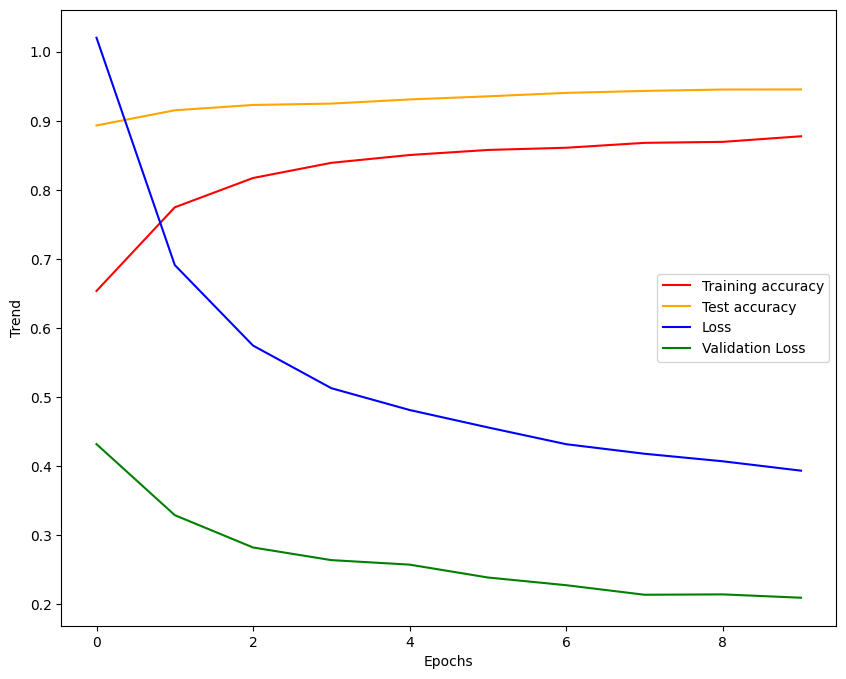

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(h.history['accuracy'], label="Training accuracy", color="red")
plt.plot(h.history['val_accuracy'], label="Test accuracy", color="Orange")
plt.plot(h.history['loss'], label="Loss", color="blue")
plt.plot(h.history['val_loss'], label="Validation Loss", color="green")
plt.xlabel("Epochs")
plt.ylabel('Trend')
plt.legend()

In [ ]:
model.save('MyFirstANN_with_Hyperparams.keras')

In [ ]:
from tensorflow.keras.models import load_model
lm=load_model('MyFirstANN_with_Hyperparams.keras')

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
import numpy as np
x=x_test[0]
y_pred=lm.predict(x)
y_pred
#for i in range(0,10):
#  print(np.argmax(y_pred[i]))

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

In [ ]:
for i in range(0,10):
  print(y_test[i])

7
2
1
0
4
1
4
9
5
9
